In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

# Homework Solution: Mini Batch Training

In [16]:

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')
    

In [20]:

    
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
n = len(data)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')
y = 87.688145 * x + 34754.077892


using batch size: 32,  dy_i = 82.55 * x + 38523.35 	 previously calculated: y_i = 87.69 * x + 34754.08    loss: 1405674128.837977


<Figure size 640x480 with 0 Axes>

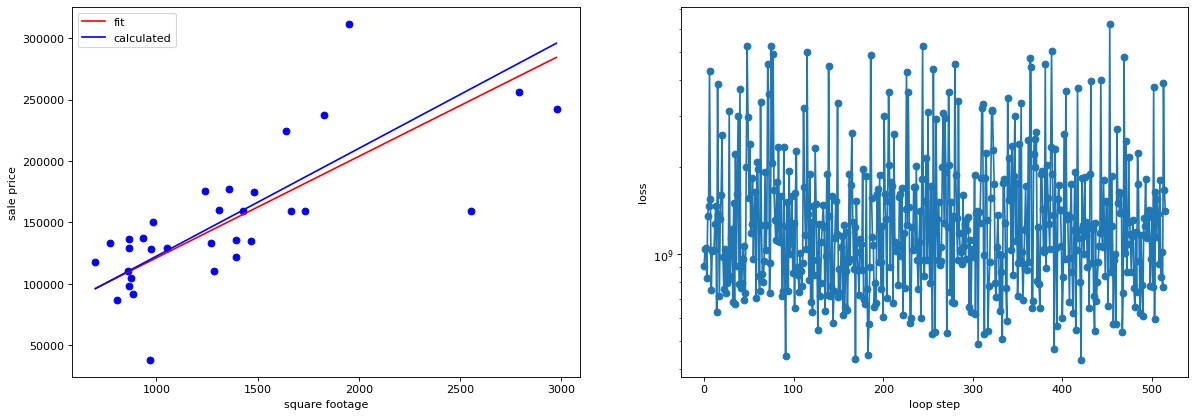

using batch size: 64,  dy_i = 92.60 * x + 30371.75 	 previously calculated: y_i = 87.69 * x + 34754.08    loss: 1194833499.404482


<Figure size 640x480 with 0 Axes>

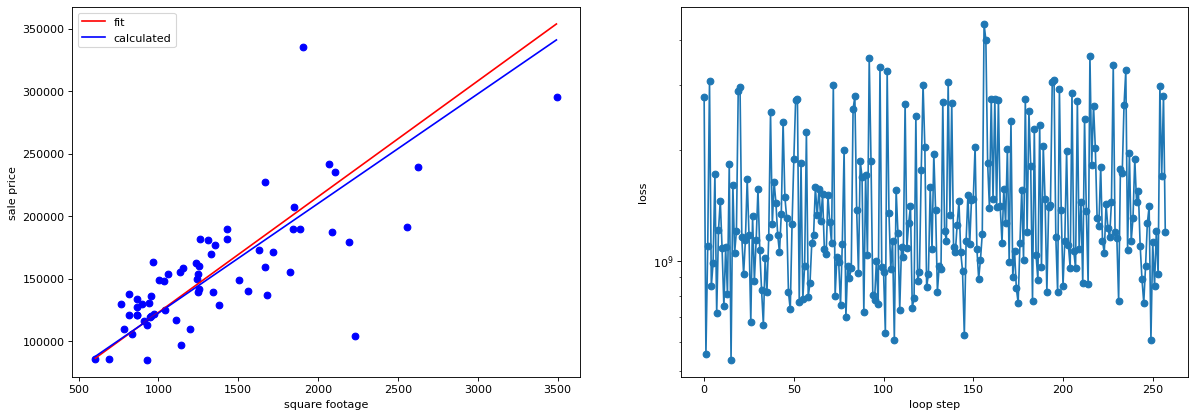

using batch size: 128,  dy_i = 87.23 * x + 32856.13 	 previously calculated: y_i = 87.69 * x + 34754.08    loss: 1155296013.581647


<Figure size 640x480 with 0 Axes>

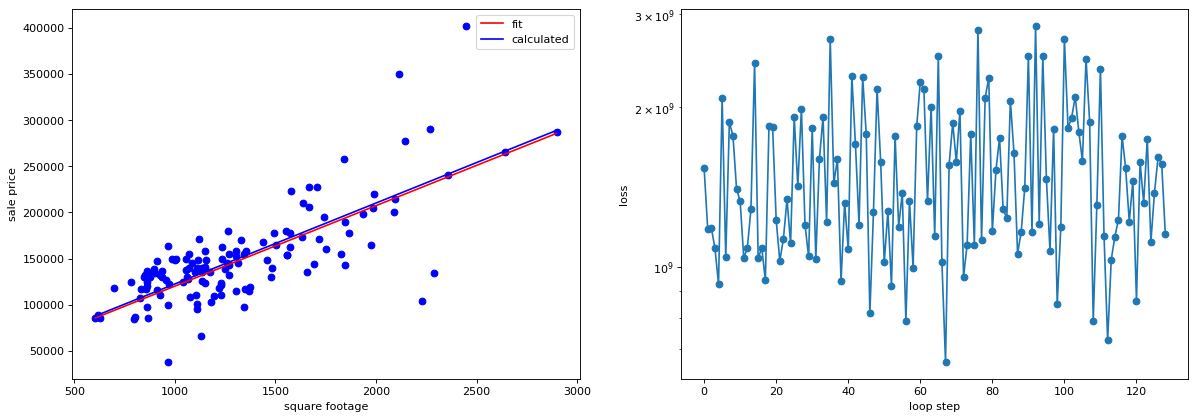

using batch size: 256,  dy_i = 90.43 * x + 32721.96 	 previously calculated: y_i = 87.69 * x + 34754.08    loss: 1500693409.504970


<Figure size 640x480 with 0 Axes>

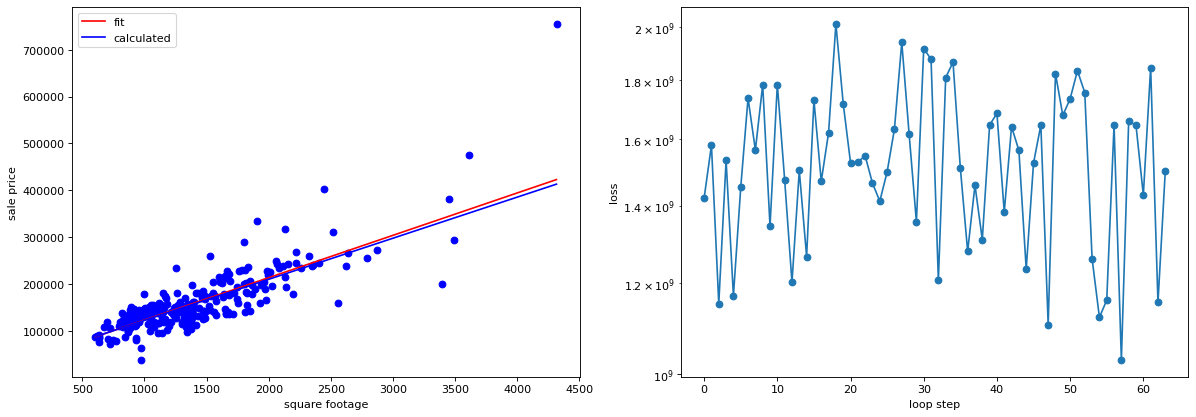

using batch size: 512,  dy_i = 88.72 * x + 33283.79 	 previously calculated: y_i = 87.69 * x + 34754.08    loss: 1489058168.240414


<Figure size 640x480 with 0 Axes>

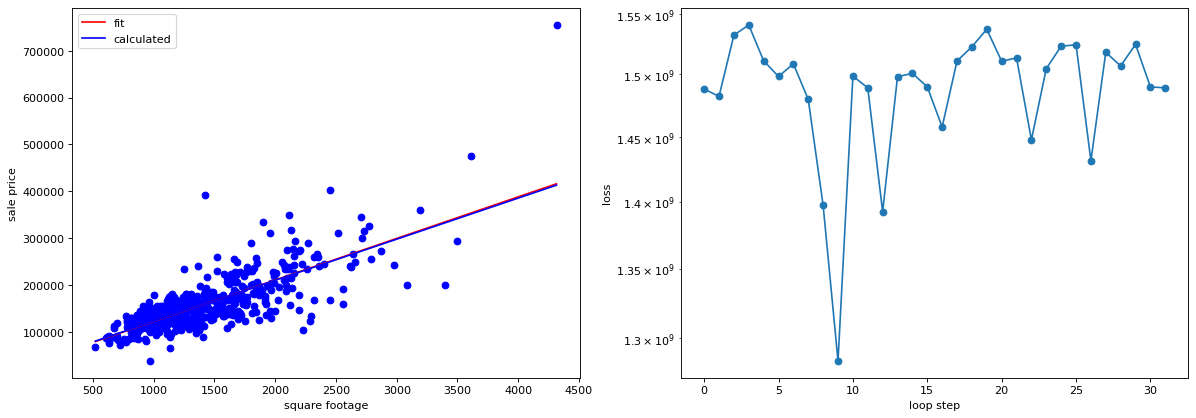

In [21]:


batch_sizes = [32, 64, 128, 256, 512]
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
# we run our loop N times
for j, batch_size in enumerate(batch_sizes):
   loss_history = []
   loop_N = 30*len(data)//batch_size
   for index in range(loop_N):
      data_batch = data.sample(batch_size)
      data_x = data_batch['GrLivArea'].to_numpy()
      data_y = data_batch['SalePrice'].to_numpy()
      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

      # calculate the loss value
      loss_value = np.mean(loss(data_x,data_y,m,b))

      # keep a history of our loss values
      loss_history.append(loss_value)

      # print our progress
      if index == loop_N-1:
         print('using batch size: %d,  dy_i = %.2f * x + %.2f \t previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (batch_size,m,b,m_calc,b_calc,loss_value))
         
         # close/delete previous plots
         plt.close('all')
         
         # create a 1 by 2 plot grid
         plt.figure(1)
         fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
         # lot our usual output
         plot_data(data_x,data_y,m,b,ax[0])

         # here we also plot the calculated linear fit for comparison
         line_x = np.arange(data_x.min(),data_x.max())
         line_y = line_x * m_calc + b_calc
         ax[0].plot(line_x,line_y,'b-',label='calculated')
         # add a legend to the plot and x/y labels
         ax[0].legend()
         ax[0].set_xlabel('square footage')
         ax[0].set_ylabel('sale price')

         # plot the loss 
         loss_x = np.arange(0,len(loss_history))
         loss_y = np.asarray(loss_history)
         ax[1].plot(loss_x,loss_y, 'o-')
         ax[1].set_yscale('log')
         ax[1].set_xlabel('loop step')
         ax[1].set_ylabel('loss')
         plt.show()
        

## Learning rate issue (Bonus)


Batch size: 64|learning_rate_m: 1.00e-07|learning_rate_b: 1.00e-01 |dy_i = 90.61 * x + 32096.47 |loss: 2.93e+09| previously calculated: y_i = 87.69 * x + 34754.08


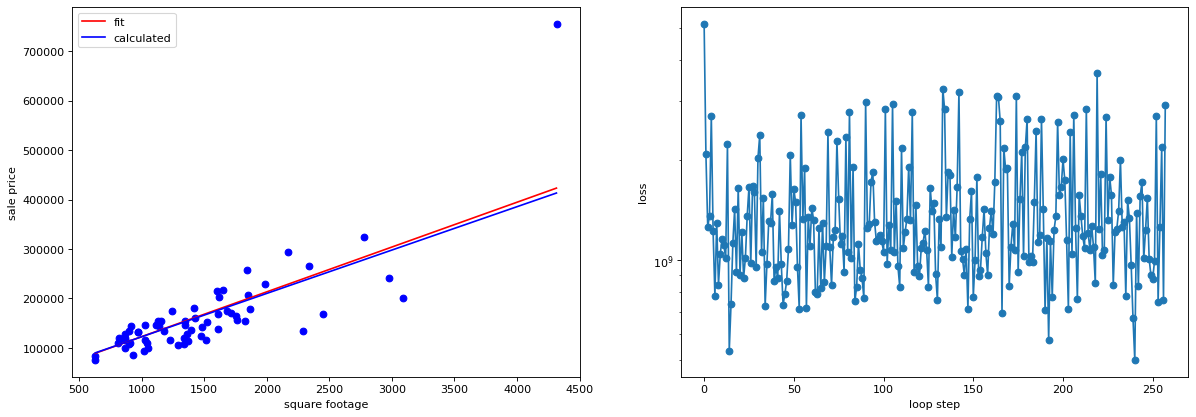

Batch size: 64|learning_rate_m: 1.00e-07|learning_rate_b: 2.00e-01 |dy_i = 86.15 * x + 37109.27 |loss: 1.45e+09| previously calculated: y_i = 87.69 * x + 34754.08


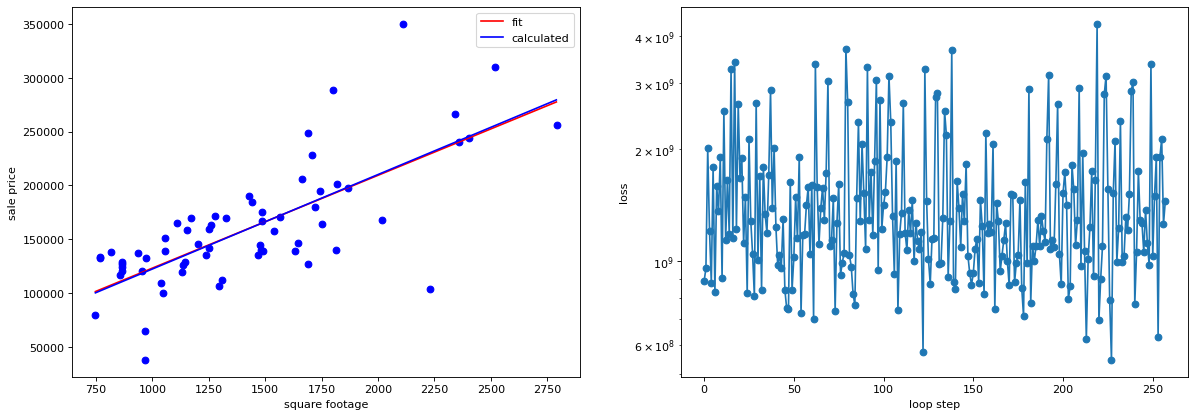

Batch size: 64|learning_rate_m: 1.00e-07|learning_rate_b: 3.00e-01 |dy_i = 91.73 * x + 38757.32 |loss: 3.43e+09| previously calculated: y_i = 87.69 * x + 34754.08


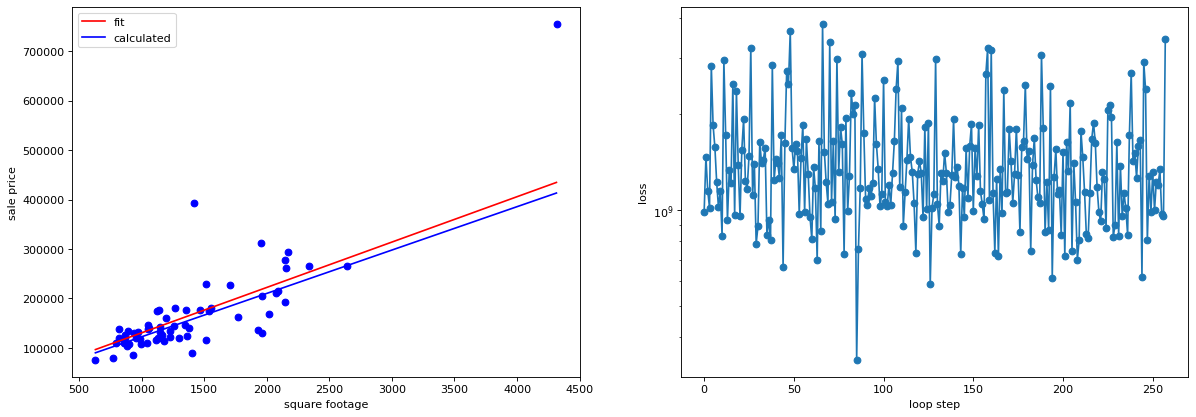

Batch size: 64|learning_rate_m: 1.00e-07|learning_rate_b: 4.00e-01 |dy_i = 89.49 * x + 38418.42 |loss: 1.37e+09| previously calculated: y_i = 87.69 * x + 34754.08


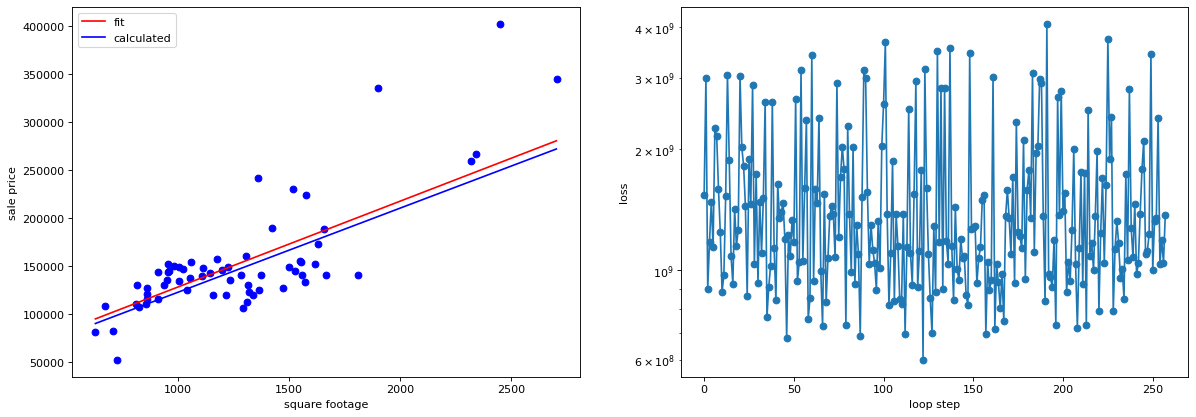

Batch size: 64|learning_rate_m: 2.00e-07|learning_rate_b: 1.00e-01 |dy_i = 89.09 * x + 34452.44 |loss: 1.71e+09| previously calculated: y_i = 87.69 * x + 34754.08


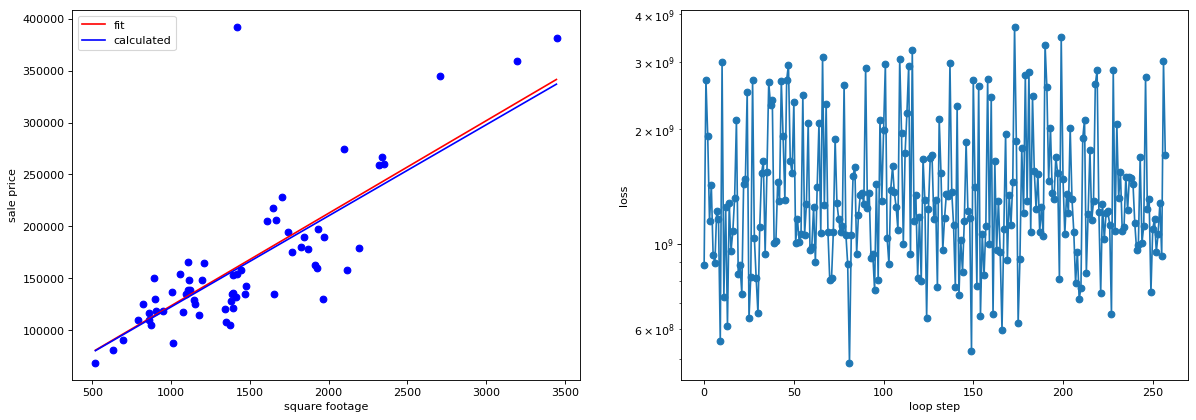

Batch size: 64|learning_rate_m: 2.00e-07|learning_rate_b: 2.00e-01 |dy_i = 98.44 * x + 33834.50 |loss: 3.31e+09| previously calculated: y_i = 87.69 * x + 34754.08


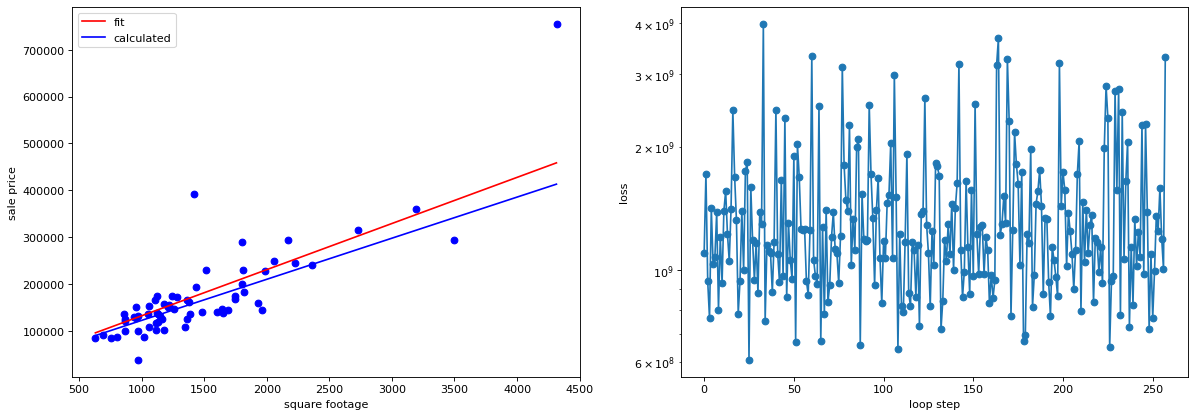

Batch size: 64|learning_rate_m: 2.00e-07|learning_rate_b: 3.00e-01 |dy_i = 88.74 * x + 34700.26 |loss: 1.86e+09| previously calculated: y_i = 87.69 * x + 34754.08


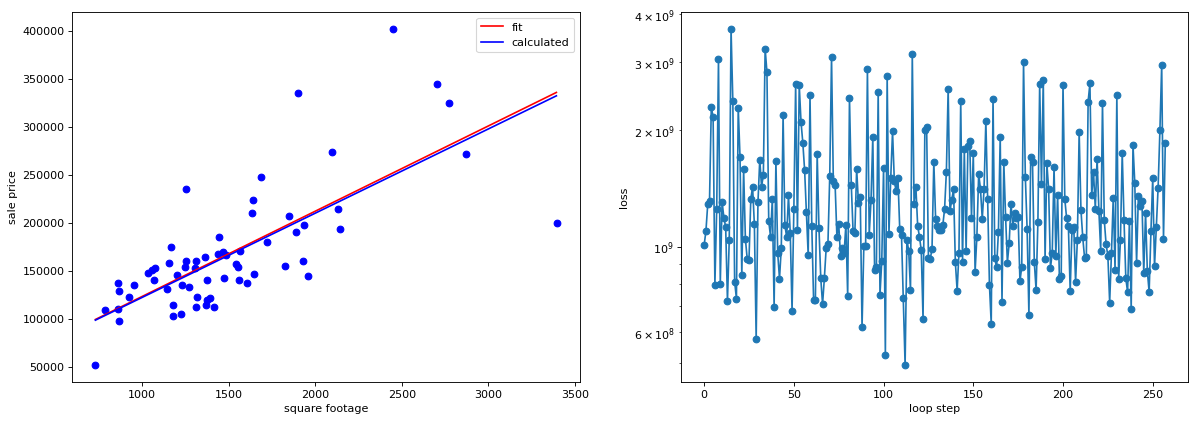

Batch size: 64|learning_rate_m: 2.00e-07|learning_rate_b: 4.00e-01 |dy_i = 76.76 * x + 41586.90 |loss: 1.25e+09| previously calculated: y_i = 87.69 * x + 34754.08


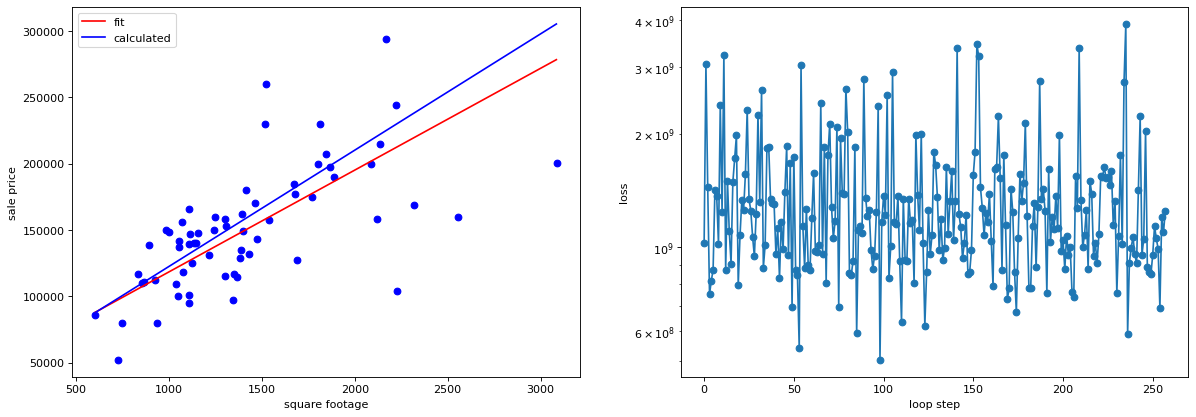

Batch size: 64|learning_rate_m: 3.00e-07|learning_rate_b: 1.00e-01 |dy_i = 82.44 * x + 38959.28 |loss: 1.26e+09| previously calculated: y_i = 87.69 * x + 34754.08


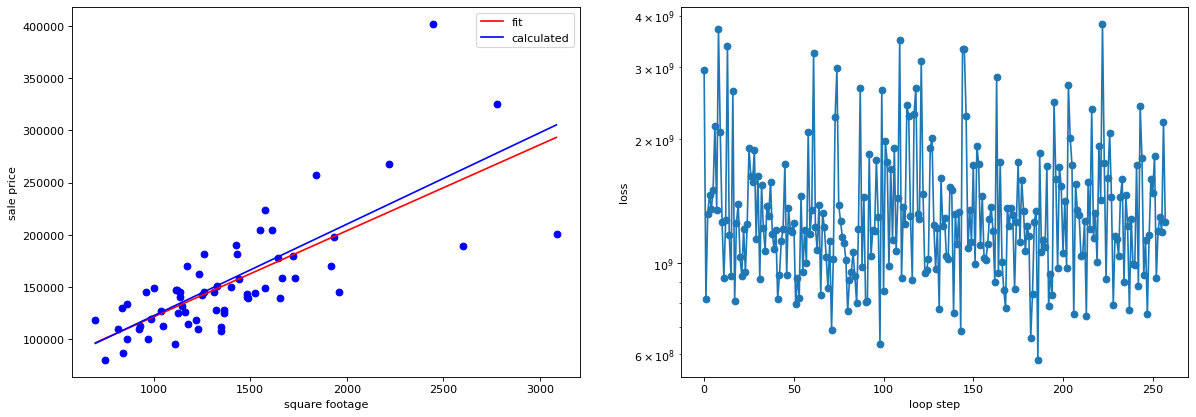

Batch size: 64|learning_rate_m: 3.00e-07|learning_rate_b: 2.00e-01 |dy_i = 90.69 * x + 32307.42 |loss: 1.66e+09| previously calculated: y_i = 87.69 * x + 34754.08


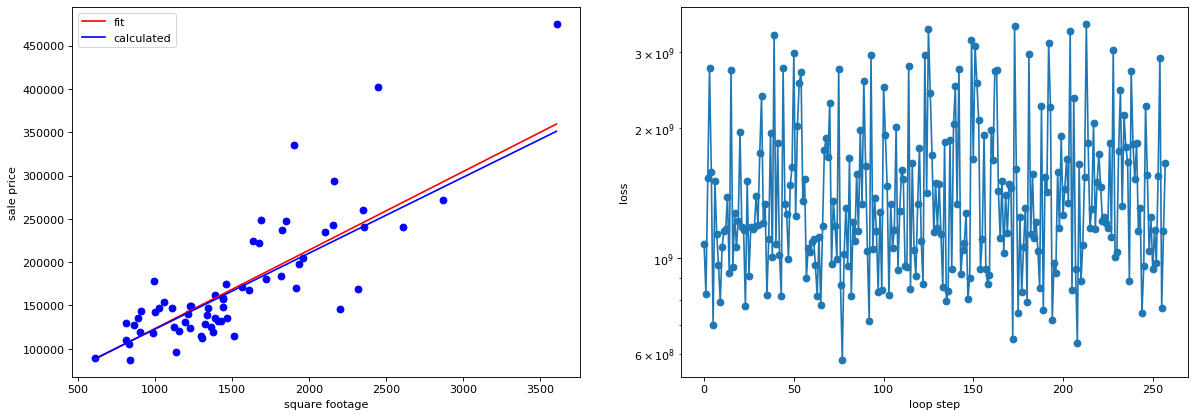

Batch size: 64|learning_rate_m: 3.00e-07|learning_rate_b: 3.00e-01 |dy_i = 83.70 * x + 37457.53 |loss: 1.41e+09| previously calculated: y_i = 87.69 * x + 34754.08


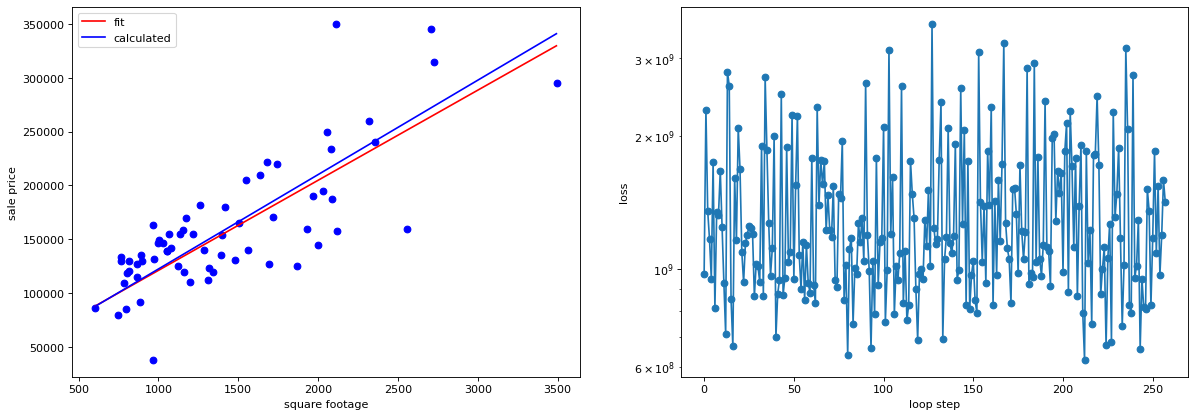

Batch size: 64|learning_rate_m: 3.00e-07|learning_rate_b: 4.00e-01 |dy_i = 91.98 * x + 35616.90 |loss: 1.51e+09| previously calculated: y_i = 87.69 * x + 34754.08


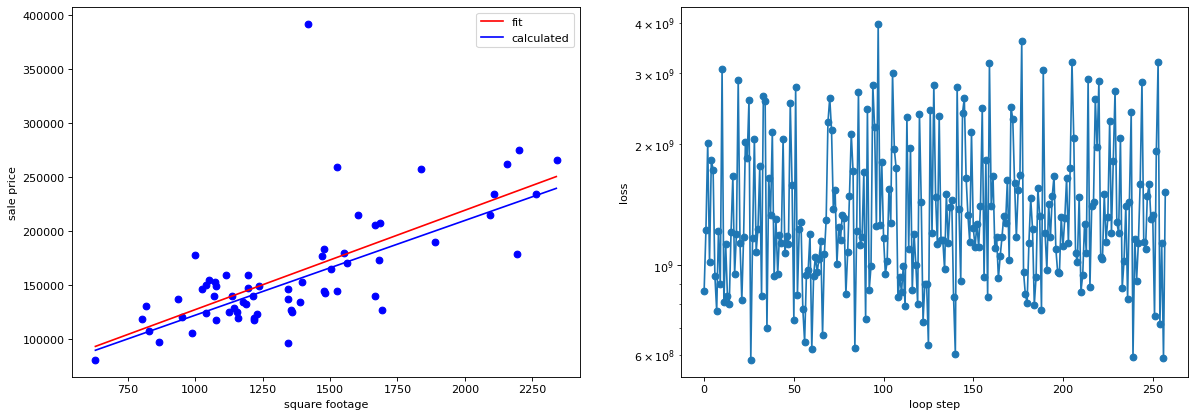

Batch size: 64|learning_rate_m: 4.00e-07|learning_rate_b: 1.00e-01 |dy_i = 94.28 * x + 32730.39 |loss: 1.21e+09| previously calculated: y_i = 87.69 * x + 34754.08


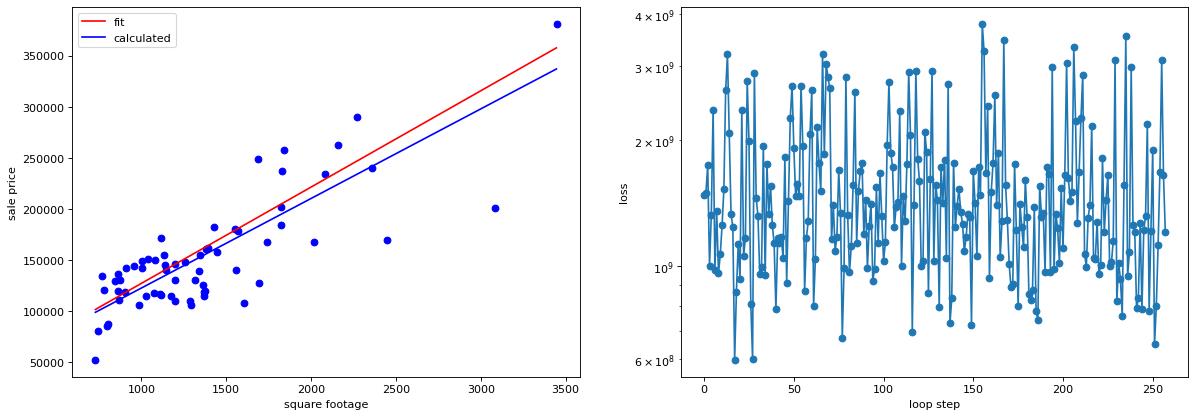

Batch size: 64|learning_rate_m: 4.00e-07|learning_rate_b: 2.00e-01 |dy_i = 79.77 * x + 37269.54 |loss: 1.19e+09| previously calculated: y_i = 87.69 * x + 34754.08


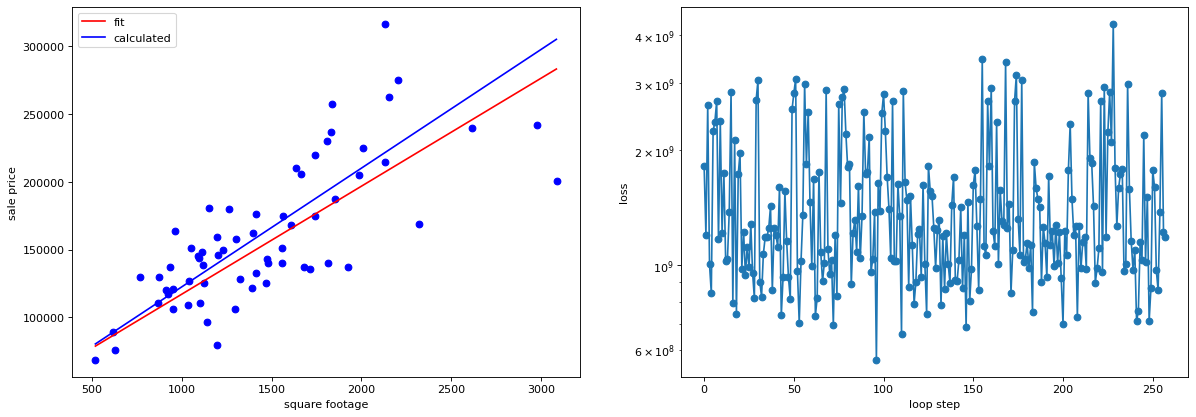

Batch size: 64|learning_rate_m: 4.00e-07|learning_rate_b: 3.00e-01 |dy_i = 80.92 * x + 33574.04 |loss: 7.61e+08| previously calculated: y_i = 87.69 * x + 34754.08


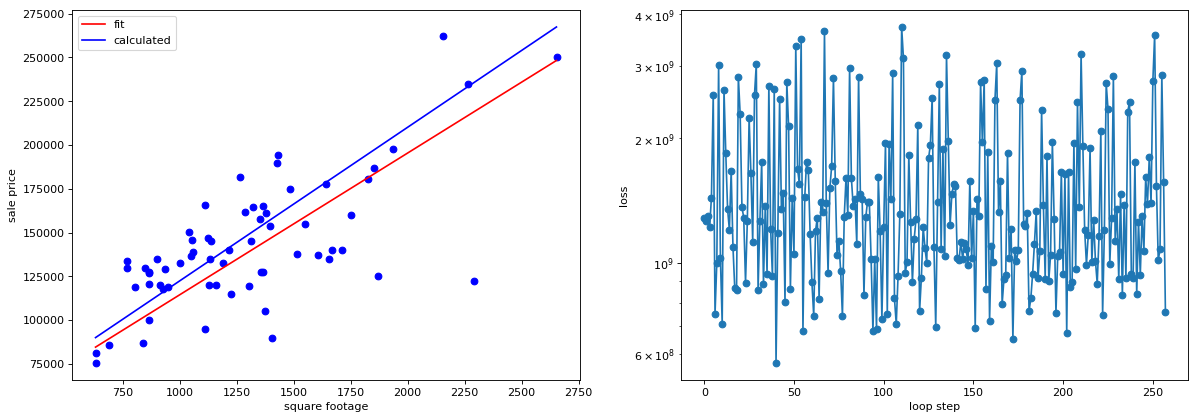

Batch size: 64|learning_rate_m: 4.00e-07|learning_rate_b: 4.00e-01 |dy_i = 87.95 * x + 35401.05 |loss: 1.85e+09| previously calculated: y_i = 87.69 * x + 34754.08


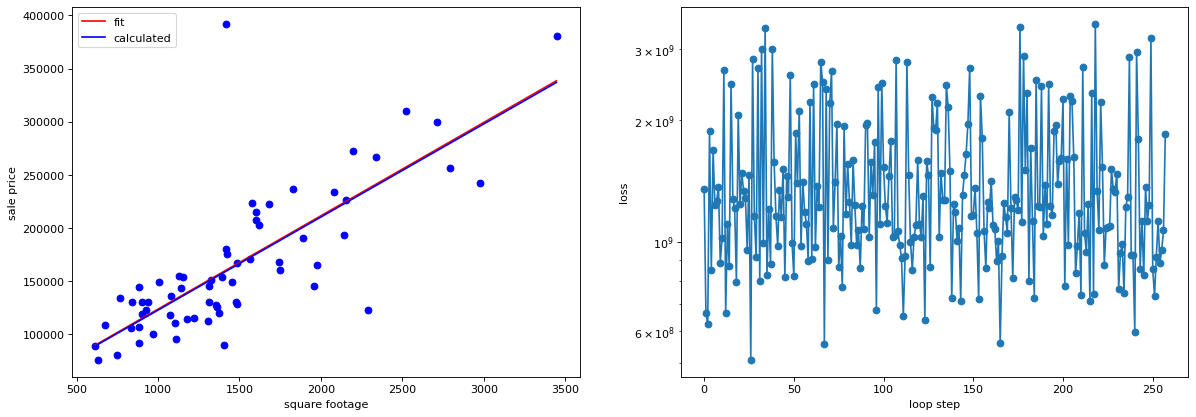

Batch size: 128|learning_rate_m: 1.00e-07|learning_rate_b: 1.00e-01 |dy_i = 86.42 * x + 34216.12 |loss: 9.34e+08| previously calculated: y_i = 87.69 * x + 34754.08


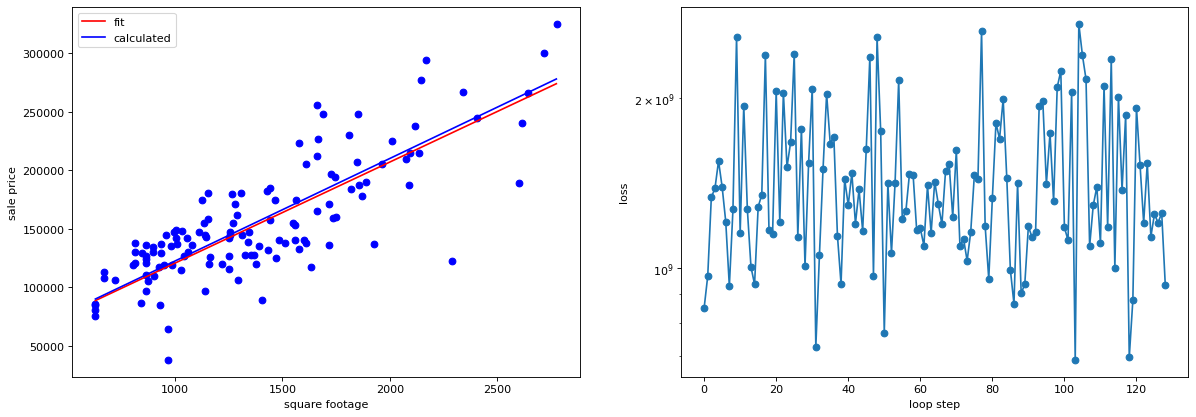

Batch size: 128|learning_rate_m: 1.00e-07|learning_rate_b: 2.00e-01 |dy_i = 91.04 * x + 33124.07 |loss: 2.26e+09| previously calculated: y_i = 87.69 * x + 34754.08


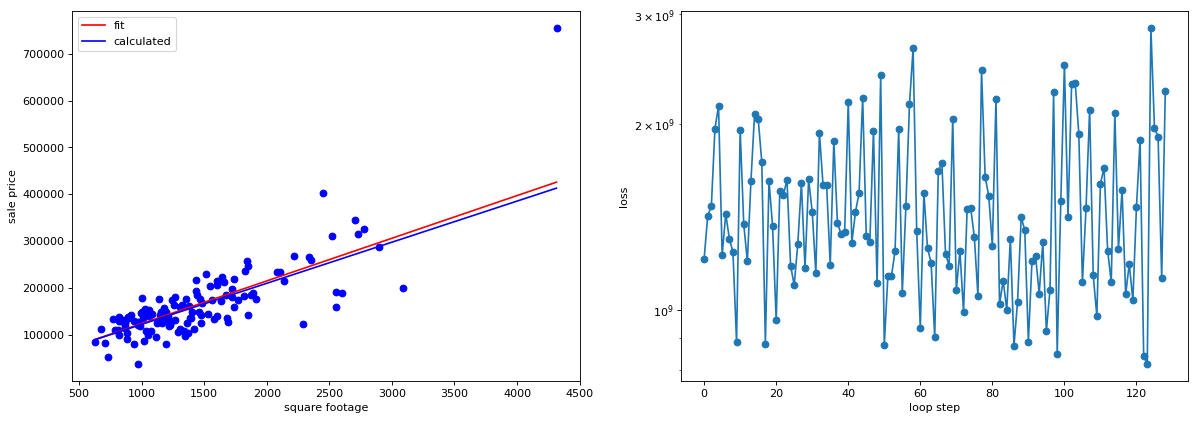

Batch size: 128|learning_rate_m: 1.00e-07|learning_rate_b: 3.00e-01 |dy_i = 87.16 * x + 33863.79 |loss: 1.26e+09| previously calculated: y_i = 87.69 * x + 34754.08


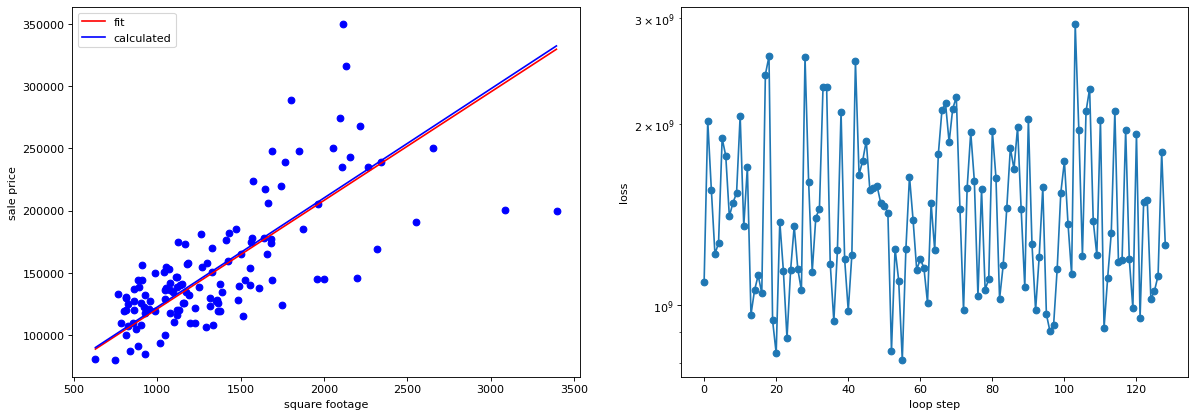

Batch size: 128|learning_rate_m: 1.00e-07|learning_rate_b: 4.00e-01 |dy_i = 88.92 * x + 27591.69 |loss: 1.11e+09| previously calculated: y_i = 87.69 * x + 34754.08


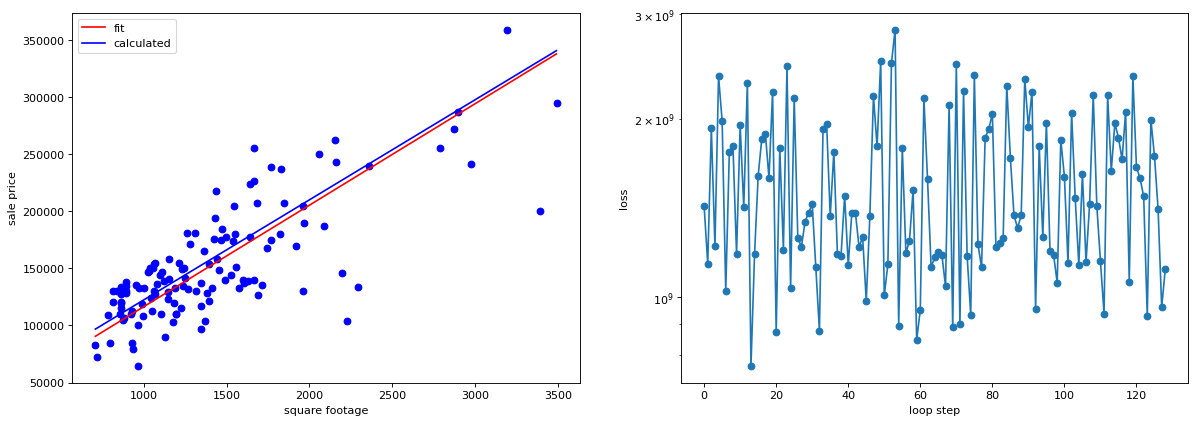

Batch size: 128|learning_rate_m: 2.00e-07|learning_rate_b: 1.00e-01 |dy_i = 83.66 * x + 33298.23 |loss: 1.15e+09| previously calculated: y_i = 87.69 * x + 34754.08


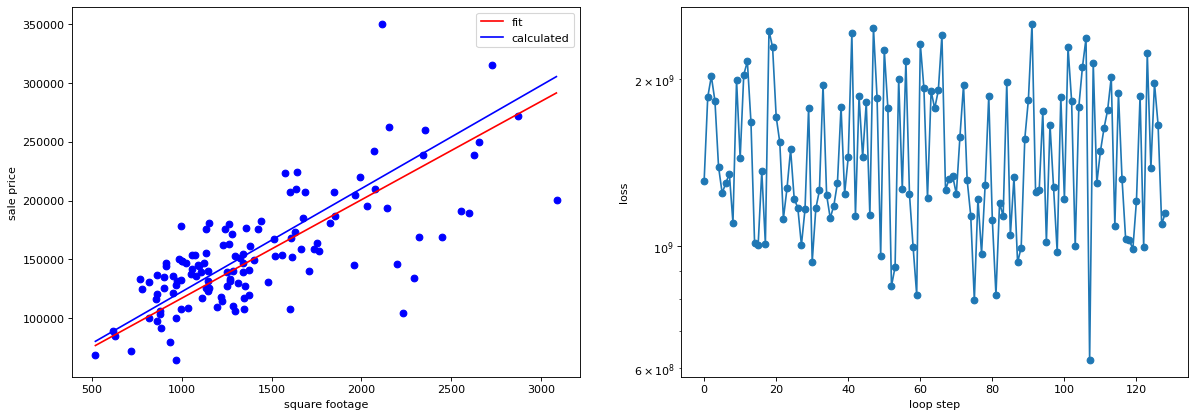

Batch size: 128|learning_rate_m: 2.00e-07|learning_rate_b: 2.00e-01 |dy_i = 88.64 * x + 31864.96 |loss: 1.25e+09| previously calculated: y_i = 87.69 * x + 34754.08


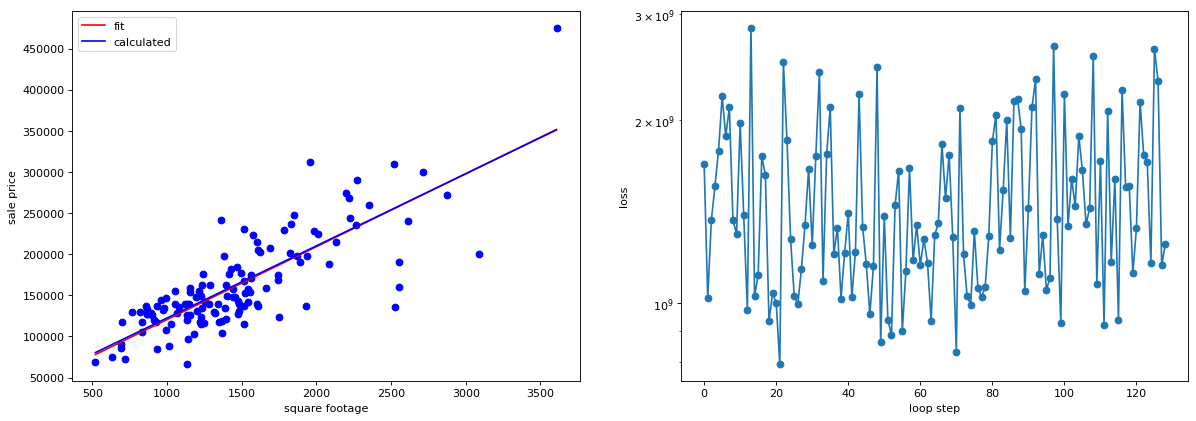

Batch size: 128|learning_rate_m: 2.00e-07|learning_rate_b: 3.00e-01 |dy_i = 87.73 * x + 39074.32 |loss: 1.41e+09| previously calculated: y_i = 87.69 * x + 34754.08


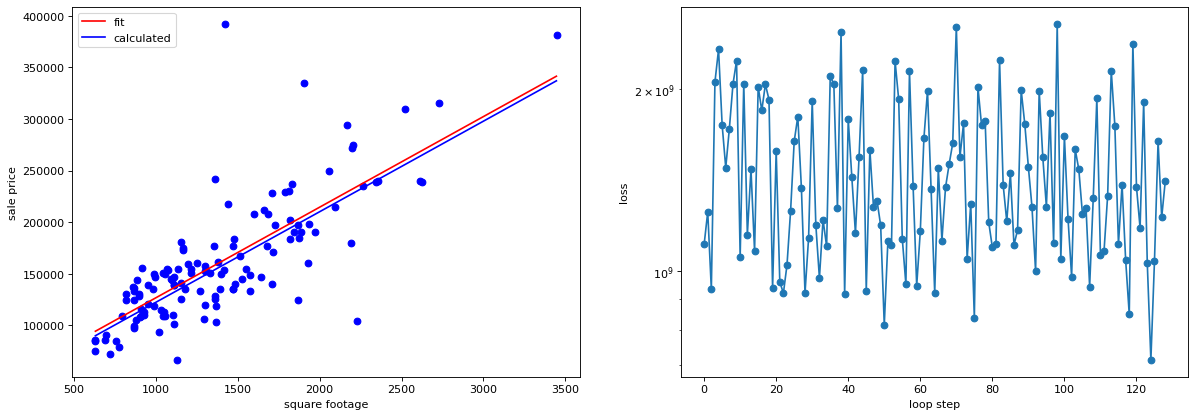

Batch size: 128|learning_rate_m: 2.00e-07|learning_rate_b: 4.00e-01 |dy_i = 84.64 * x + 42214.62 |loss: 2.17e+09| previously calculated: y_i = 87.69 * x + 34754.08


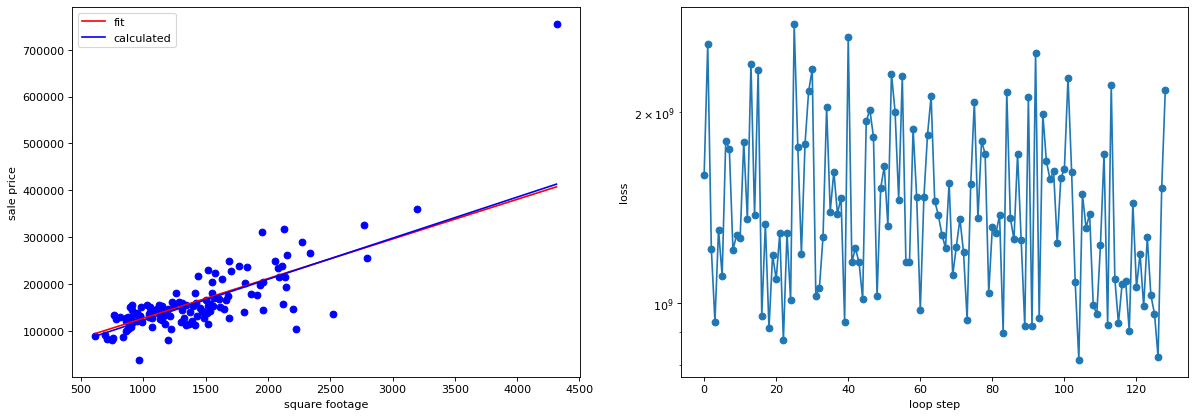

Batch size: 128|learning_rate_m: 3.00e-07|learning_rate_b: 1.00e-01 |dy_i = 80.11 * x + 38067.84 |loss: 1.53e+09| previously calculated: y_i = 87.69 * x + 34754.08


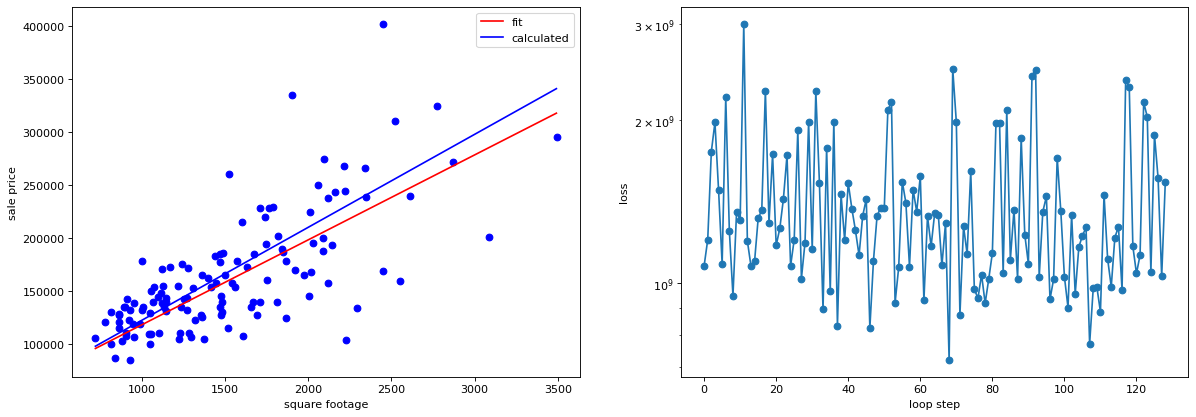

Batch size: 128|learning_rate_m: 3.00e-07|learning_rate_b: 2.00e-01 |dy_i = 86.65 * x + 35657.54 |loss: 1.64e+09| previously calculated: y_i = 87.69 * x + 34754.08


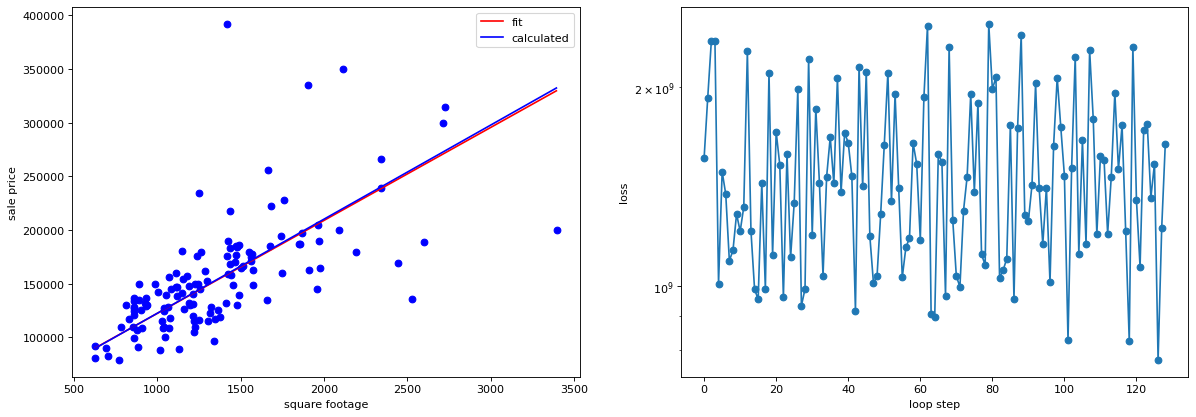

Batch size: 128|learning_rate_m: 3.00e-07|learning_rate_b: 3.00e-01 |dy_i = 94.41 * x + 29517.06 |loss: 2.12e+09| previously calculated: y_i = 87.69 * x + 34754.08


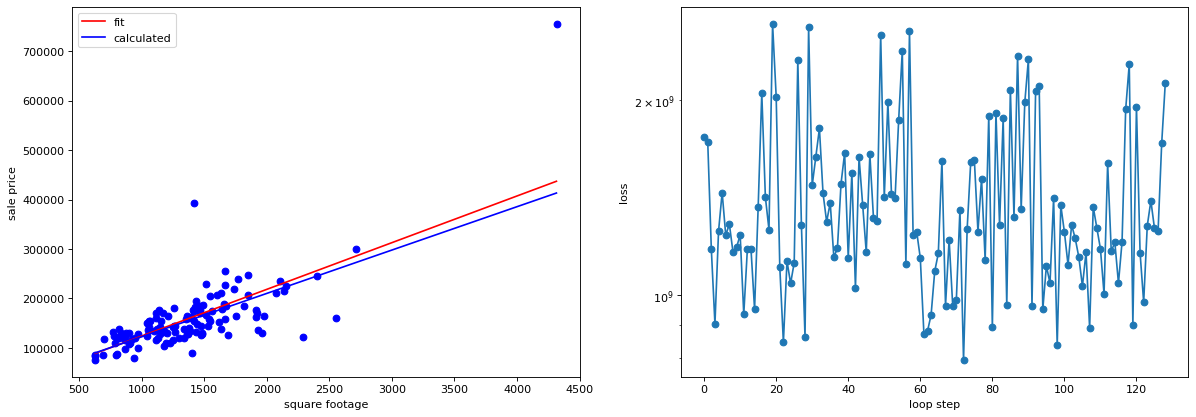

Batch size: 128|learning_rate_m: 3.00e-07|learning_rate_b: 4.00e-01 |dy_i = 84.12 * x + 43116.50 |loss: 1.55e+09| previously calculated: y_i = 87.69 * x + 34754.08


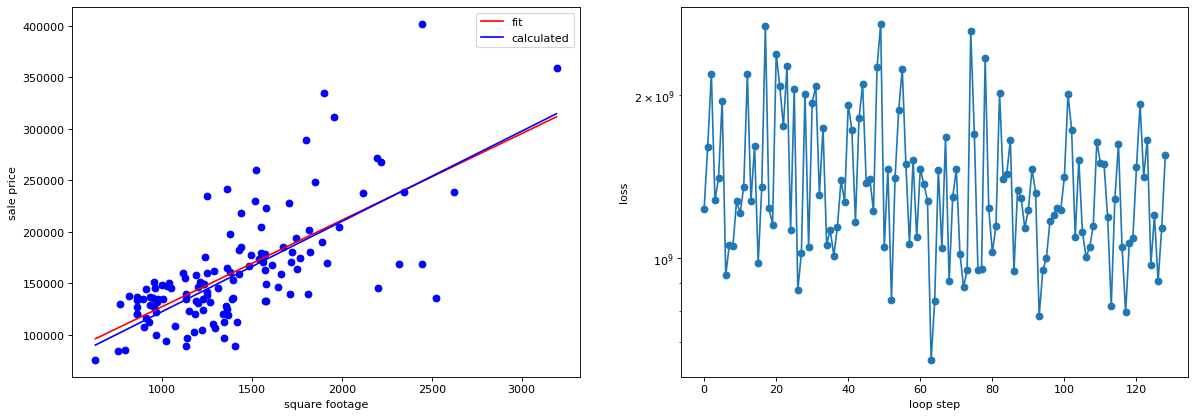

Batch size: 128|learning_rate_m: 4.00e-07|learning_rate_b: 1.00e-01 |dy_i = 85.24 * x + 37446.18 |loss: 1.90e+09| previously calculated: y_i = 87.69 * x + 34754.08


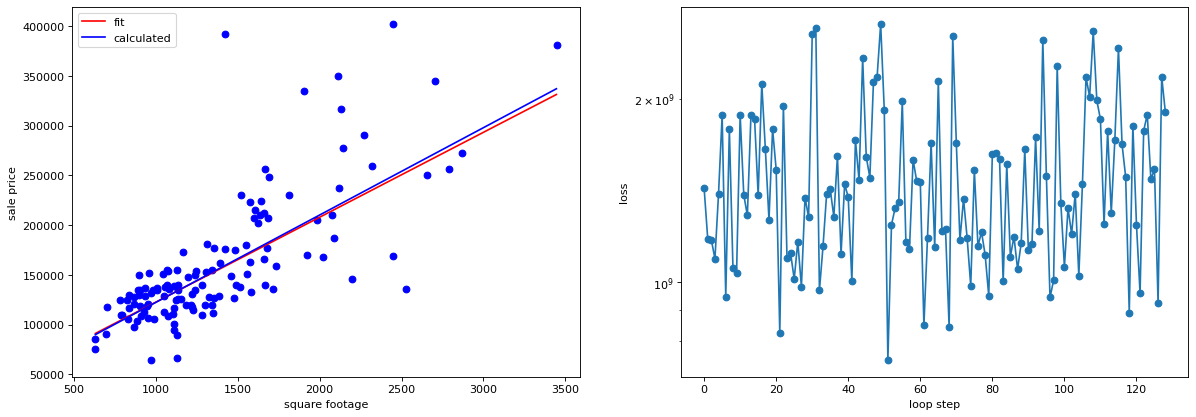

Batch size: 128|learning_rate_m: 4.00e-07|learning_rate_b: 2.00e-01 |dy_i = 85.16 * x + 36951.36 |loss: 9.15e+08| previously calculated: y_i = 87.69 * x + 34754.08


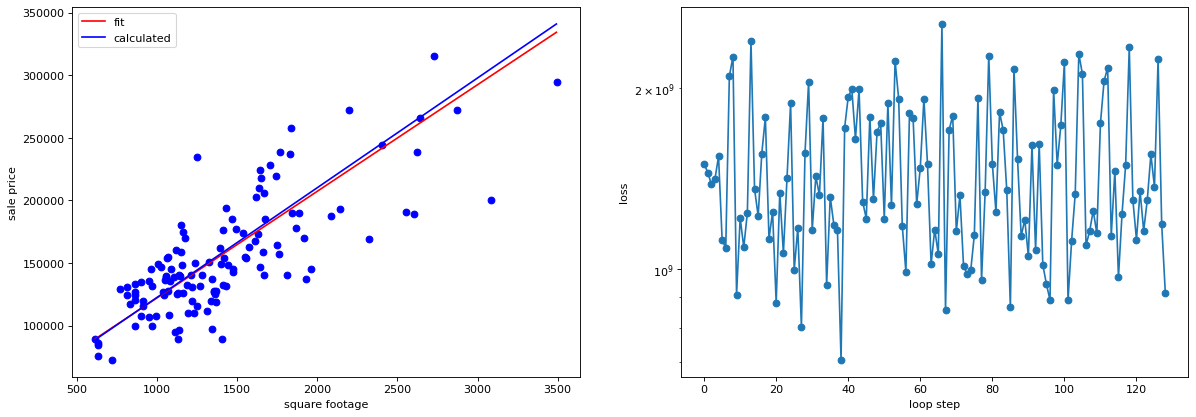

Batch size: 128|learning_rate_m: 4.00e-07|learning_rate_b: 3.00e-01 |dy_i = 87.29 * x + 33370.87 |loss: 1.61e+09| previously calculated: y_i = 87.69 * x + 34754.08


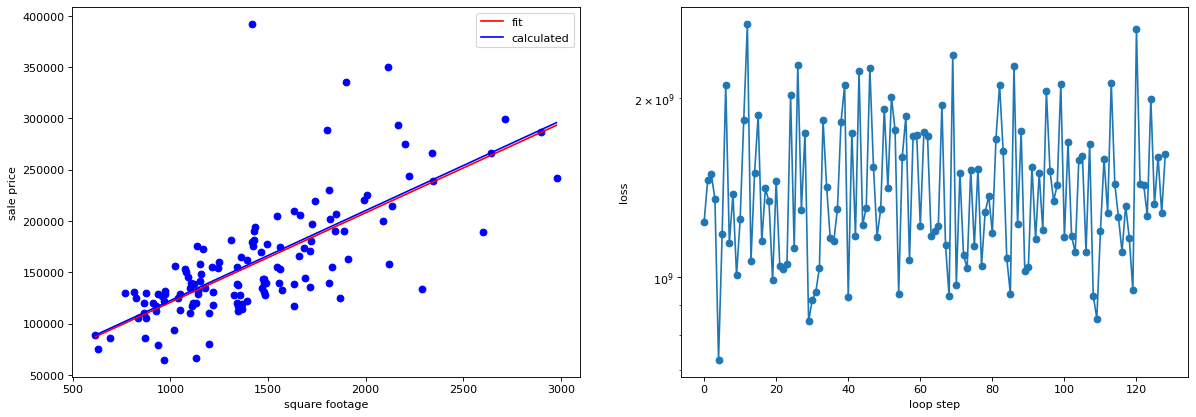

Batch size: 128|learning_rate_m: 4.00e-07|learning_rate_b: 4.00e-01 |dy_i = 90.85 * x + 35578.90 |loss: 1.33e+09| previously calculated: y_i = 87.69 * x + 34754.08


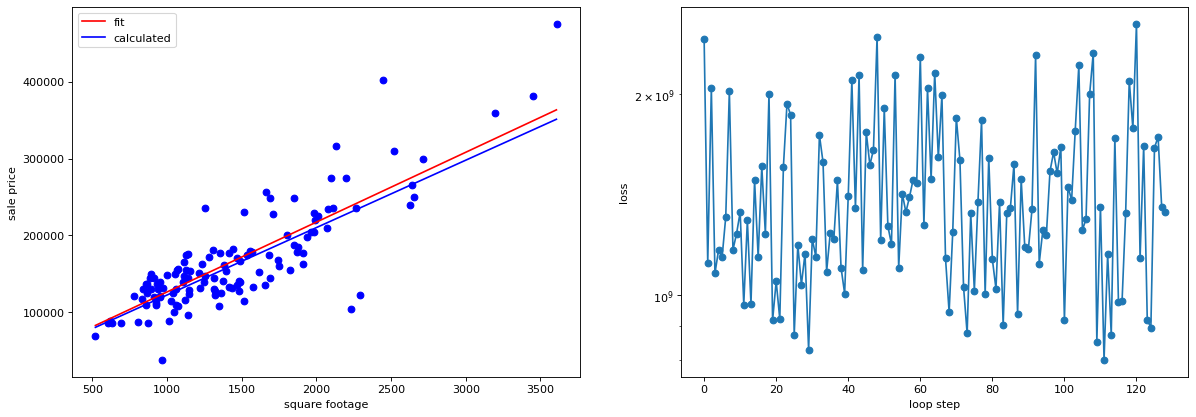

Batch size: 192|learning_rate_m: 1.00e-07|learning_rate_b: 1.00e-01 |dy_i = 86.96 * x + 36260.94 |loss: 1.06e+09| previously calculated: y_i = 87.69 * x + 34754.08


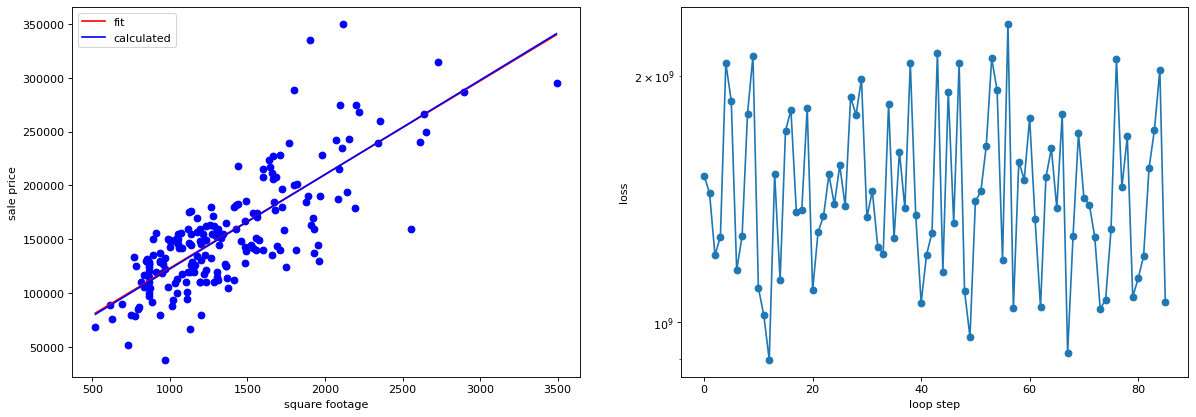

Batch size: 192|learning_rate_m: 1.00e-07|learning_rate_b: 2.00e-01 |dy_i = 89.97 * x + 30502.91 |loss: 1.11e+09| previously calculated: y_i = 87.69 * x + 34754.08


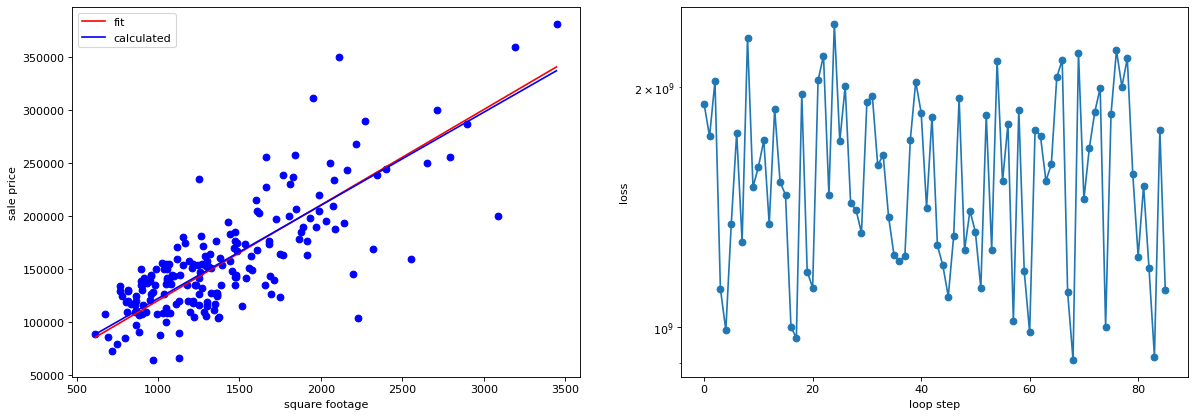

Batch size: 192|learning_rate_m: 1.00e-07|learning_rate_b: 3.00e-01 |dy_i = 87.02 * x + 36058.86 |loss: 1.39e+09| previously calculated: y_i = 87.69 * x + 34754.08


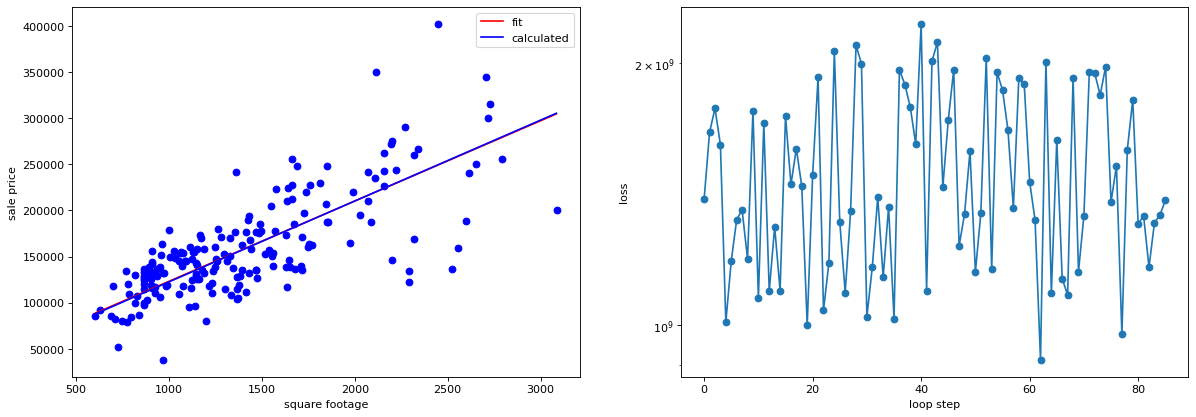

Batch size: 192|learning_rate_m: 1.00e-07|learning_rate_b: 4.00e-01 |dy_i = 86.74 * x + 33272.88 |loss: 1.86e+09| previously calculated: y_i = 87.69 * x + 34754.08


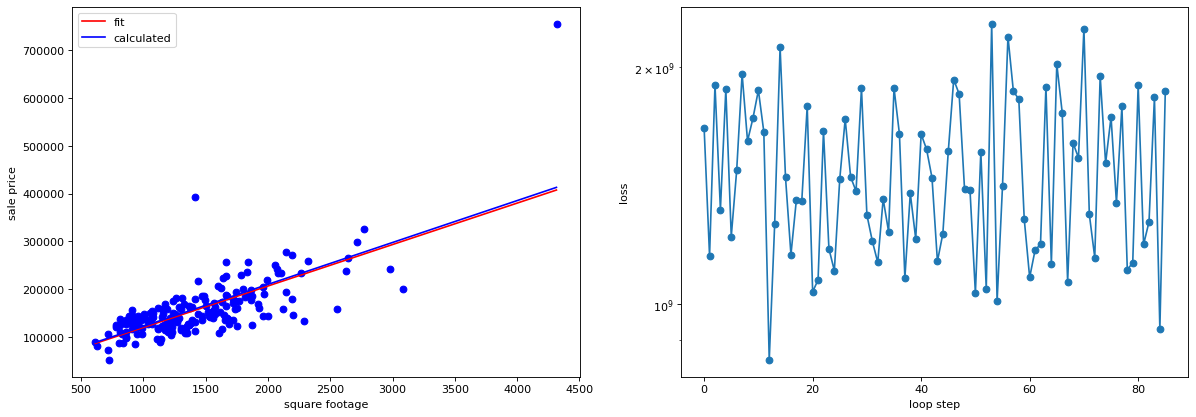

Batch size: 192|learning_rate_m: 2.00e-07|learning_rate_b: 1.00e-01 |dy_i = 88.39 * x + 34208.72 |loss: 1.83e+09| previously calculated: y_i = 87.69 * x + 34754.08


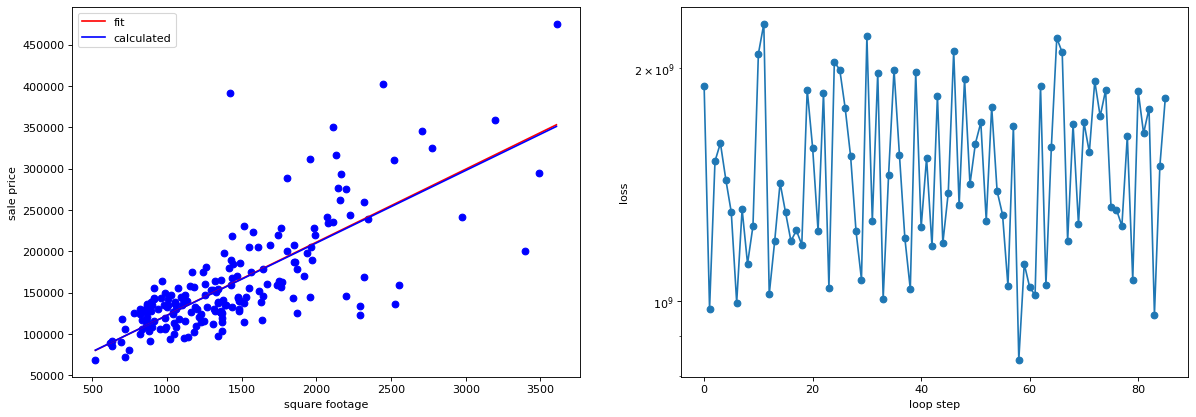

Batch size: 192|learning_rate_m: 2.00e-07|learning_rate_b: 2.00e-01 |dy_i = 87.86 * x + 37066.35 |loss: 1.69e+09| previously calculated: y_i = 87.69 * x + 34754.08


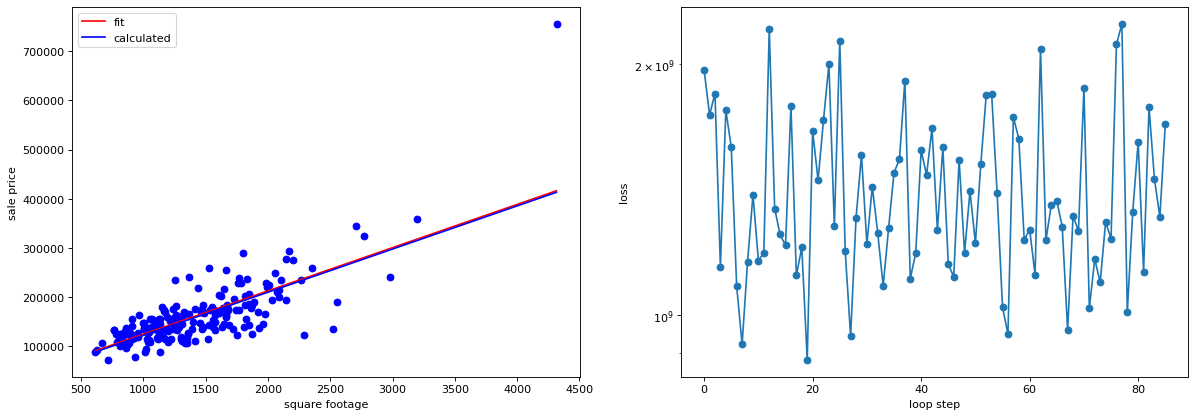

Batch size: 192|learning_rate_m: 2.00e-07|learning_rate_b: 3.00e-01 |dy_i = 87.89 * x + 35297.90 |loss: 9.48e+08| previously calculated: y_i = 87.69 * x + 34754.08


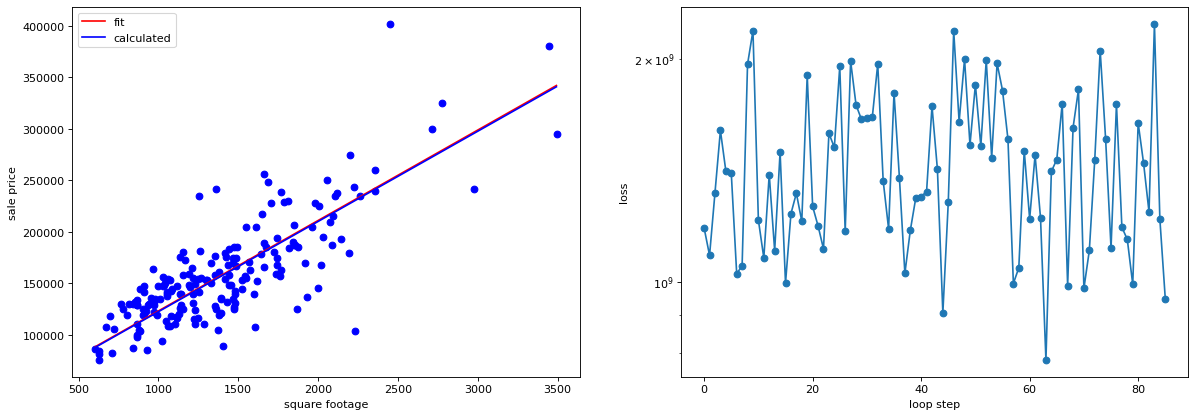

Batch size: 192|learning_rate_m: 2.00e-07|learning_rate_b: 4.00e-01 |dy_i = 88.37 * x + 34544.86 |loss: 1.56e+09| previously calculated: y_i = 87.69 * x + 34754.08


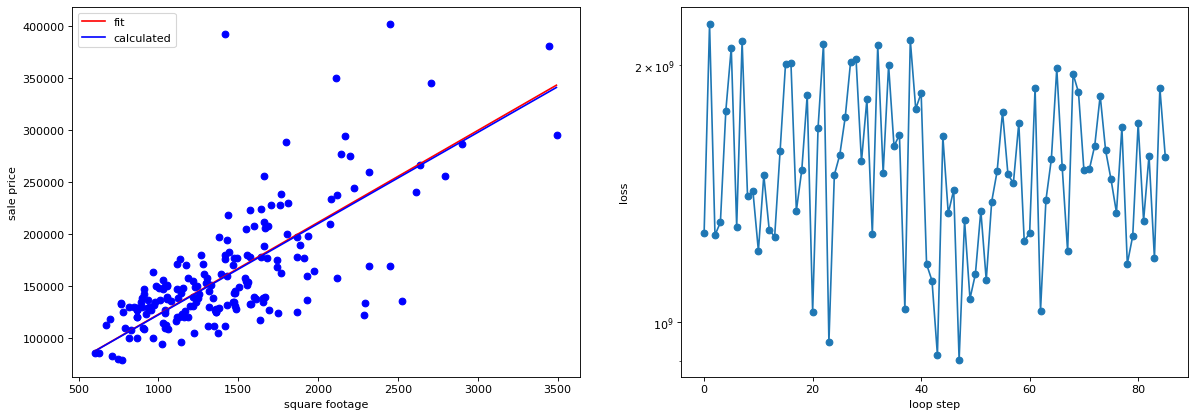

Batch size: 192|learning_rate_m: 3.00e-07|learning_rate_b: 1.00e-01 |dy_i = 87.52 * x + 37260.84 |loss: 1.15e+09| previously calculated: y_i = 87.69 * x + 34754.08


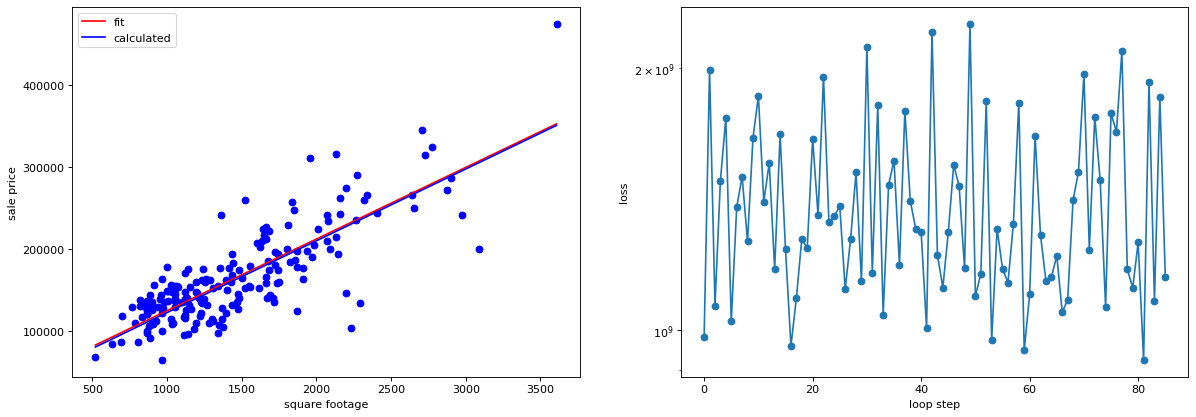

Batch size: 192|learning_rate_m: 3.00e-07|learning_rate_b: 2.00e-01 |dy_i = 88.50 * x + 33091.78 |loss: 1.33e+09| previously calculated: y_i = 87.69 * x + 34754.08


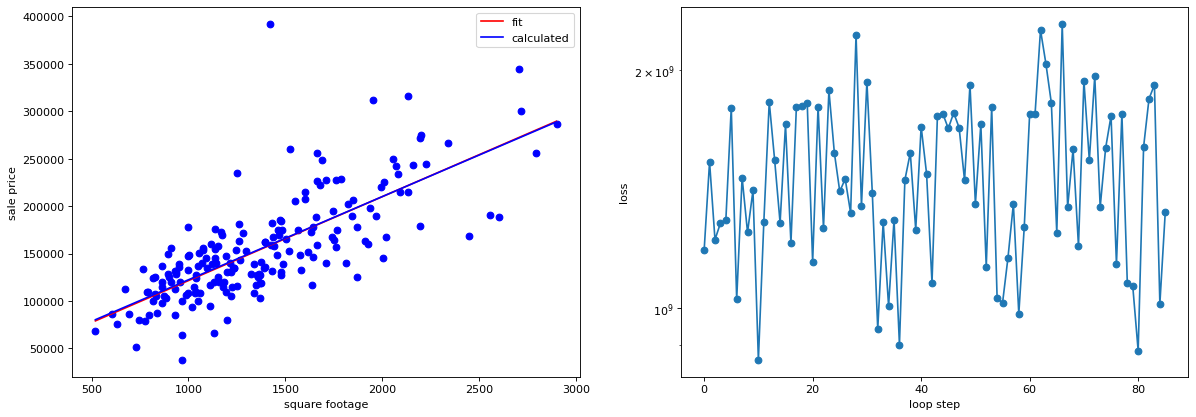

Batch size: 192|learning_rate_m: 3.00e-07|learning_rate_b: 3.00e-01 |dy_i = 93.32 * x + 31239.78 |loss: 1.65e+09| previously calculated: y_i = 87.69 * x + 34754.08


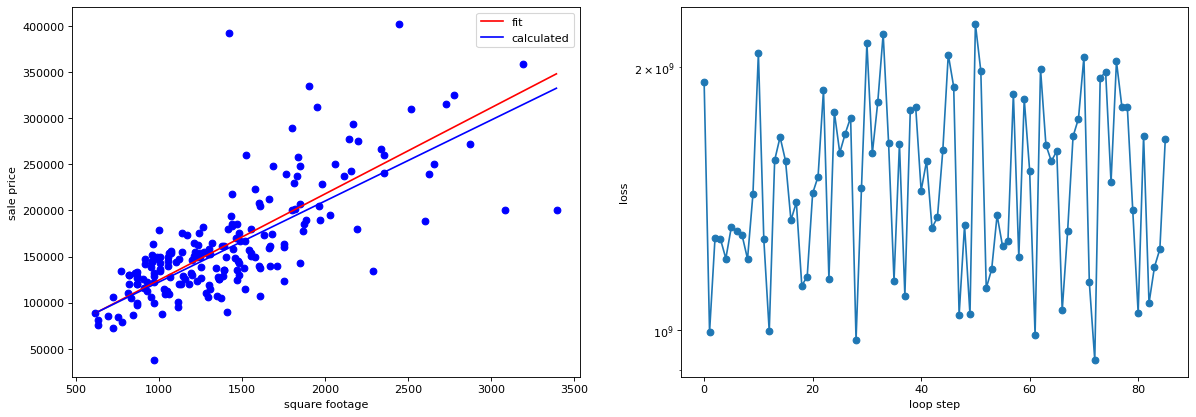

Batch size: 192|learning_rate_m: 3.00e-07|learning_rate_b: 4.00e-01 |dy_i = 90.64 * x + 31458.07 |loss: 1.20e+09| previously calculated: y_i = 87.69 * x + 34754.08


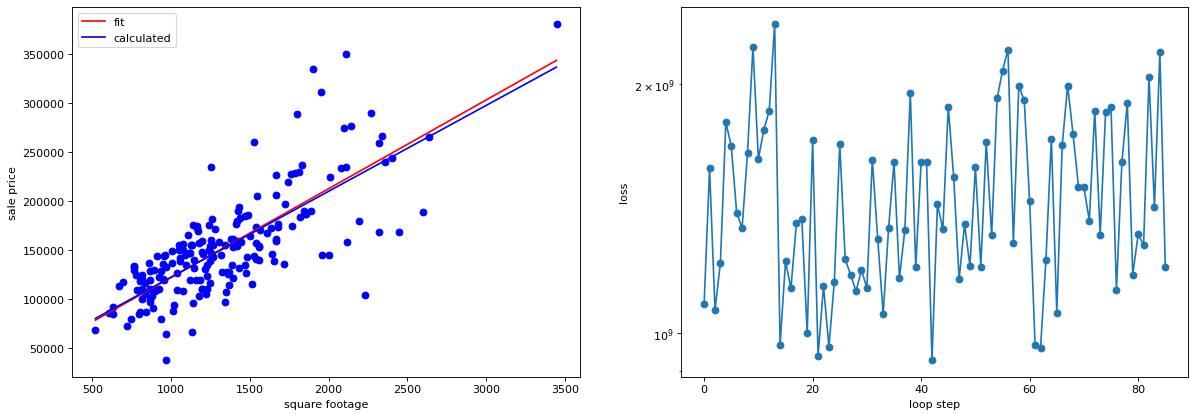

In [ ]:
# set our initial slope and intercept
m = 5.0
b = 1000.0
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"

# we run our loop N times
epsilon = 0.001
for index_batch_size in range(1,5):
      batch_size = 64 * index_batch_size
      for index_learning_rate_m in range(1,5):
            learning_rate_m = 1e-7 * index_learning_rate_m
            for index_learning_rate_b in range(1,5):
                  learning_rate_b = 1e-1 * index_learning_rate_b

                  loss_history = []
                  loop_N = 30*len(data)//batch_size

                  for index2 in range(loop_N):
                     if len(loss_history) > 2 and (np.abs(loss_history[-2] - loss_history[-1])< epsilon):
                        print("convergence achieved with loss accuracy: " ,epsilon)
                        break;
                  
                     data_batch = data.sample(np.min([batch_size, len(data)-1]))
                     data_x = data_batch['GrLivArea'].to_numpy()
                     data_y = data_batch['SalePrice'].to_numpy()
                     # update our slope and intercept based on the current values
                     m = updated_m(data_x,data_y,m,b,learning_rate_m)
                     b = updated_b(data_x,data_y,m,b,learning_rate_b)

                     # calculate the loss value
                     loss_value = np.mean(loss(data_x,data_y,m,b))

                     # keep a history of our loss values
                  
                     loss_history.append(loss_value)
                     if index2 == loop_N-1:
                        # print our progress
                        print('Batch size: %d|learning_rate_m: %0.2e|learning_rate_b: %0.2e |dy_i = %.2f * x + %.2f |loss: %0.2e| previously calculated: y_i = %.2f * x + %.2f' % (batch_size,
                        learning_rate_m, learning_rate_b, m,b,loss_value,m_calc,b_calc))
                        
                        # close/delete previous plots
                        plt.close('all')

                        # create a 1 by 2 plot grid
                        fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
                        # lot our usual output
                        plot_data(data_x,data_y,m,b,ax[0])

                        # here we also plot the calculated linear fit for comparison
                        line_x = np.arange(data_x.min(),data_x.max())
                        line_y = line_x * m_calc + b_calc
                        ax[0].plot(line_x,line_y,'b-',label='calculated')
                        # add a legend to the plot and x/y labels
                        ax[0].legend()
                        ax[0].set_xlabel('square footage')
                        ax[0].set_ylabel('sale price')

                        # plot the loss 
                        loss_x = np.arange(0,len(loss_history))
                        loss_y = np.asarray(loss_history)
                        ax[1].plot(loss_x,loss_y, 'o-')
                        ax[1].set_yscale('log')
                        ax[1].set_xlabel('loop step')
                        ax[1].set_ylabel('loss')
                        plt.show()
